# Name: Yi Liu    ; USC ID: 8666552780

In [1]:
import pandas as pd
import statsmodels.api as sm
import pandas_datareader.data as web
import datetime
import pandas_datareader as pdr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# statistical arbitrage via PCA

### step 1: access historical share-price data on a cross_section of p stocks going back n days in history

In [2]:
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2020,12,31)

stock_list = ['AAPL','MSFT','GOOG','2222.SR','AMZN','TSLA','FB','NVDA','BRK-A','TSM',
             'TCEHY','JPM','V','HD','005930.KS','UNH','JNJ','LVMUY','600519.SS','WMT',
             'PG','BABA','NSRGY','BAC','RHHBY','MA','ASML','ADBE','PFE','DIS',
             'NFLX','NKE','XOM','OR.PA','TM','CRM','NVO','TMO','1398.HK','ORCL',
             '300750.SZ','CSCO','CMCSA','KO','LLY','COST','ABT','AVGO','PEP','ACN',
             'CVX','DHR','PYPL','ABBV','VZ','RELIANCE.NS','INTC','3968.HK','MPNGF',
             'QCOM','WFC','MCD','HESAF','MRK','INTU','NVS','TXN','SHOP','MS','UPS',
             'NEE','CICHY','TCS.NS','RYDAF','AZN','LOW','AMD','PRX.VI','LIN','T',
             'UNP','ACGBY','SAP','SONY','KYCCF','SCHW','MDT','BHP','TMUS','RY',
             'PM','HON','000858.SZ','PTR','PNGAY','002594.SZ','SE','CDI.PA','BLK','UL']
data = yf.download(stock_list,start,end)
data = data['Close']

[*********************100%***********************]  100 of 100 completed


In [3]:
# According to US Market closed timetable:
# in 2019: 2019-01-01,2019-01-21,2019-02-18,2019-04-19,2019-05-27,2019-07-04,2019-09-02,2019-11-28,2019-12-25 closed
# in 2020: 2020-01-01,2020-01-20,2020-02-17,2020-04-10,2020-05-25,2020-07-03,2020-07-04,2020-09-07,2020-10-12,2020-11-03,2020-11-11,
#          2020-11-26,2020-12-25

In [4]:
df = data.reset_index()

In [5]:
# remove the null value due to market closing
list1 = ['2019-01-01','2019-01-21','2019-02-18','2019-04-19','2019-05-27','2019-07-04','2019-09-02','2019-11-28','2019-12-25',
                      '2020-01-01','2020-01-20','2020-02-17','2020-04-10','2020-05-25','2020-07-03','2020-07-04','2020-09-07','2020-10-12',
                      '2020-11-03','2020-11-11','2020-11-26','2020-12-25','2020-12-27']
df1 = df[~df['Date'].isin(list1)][1:].set_index('Date')

In [6]:
# '2222.SR' has available data till '2019-12-11','MPNGF' has available data till '2019-03-08','PRX.VI' has available data till '2019-9-27'
# So remove three columns

In [7]:
df1= df1.drop(columns=['2222.SR','MPNGF','PRX.VI'],axis=1)

In [8]:
# use linear regression to fill in null value (IterativeImputer)

In [9]:
# use knn to fill in null values(KNNImputer)

In [10]:
df1

,000858.SZ,002594.SZ,005930.KS,1398.HK,300750.SZ,3968.HK,600519.SS,AAPL,ABBV,ABT,...,TXN,UL,UNH,UNP,UPS,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,49.939999,49.169998,38750.0,5.43,73.660004,27.700001,598.979980,157.919998,89.230003,69.500000,...,94.449997,52.110001,243.490005,137.779999,97.209999,132.919998,56.020000,46.939999,93.339996,69.690002
2019-01-03,48.959999,48.060001,37600.0,5.44,73.830002,27.600000,590.000000,142.190002,86.290001,66.220001,...,88.879997,51.869999,236.850006,132.679993,94.449997,128.130005,56.220001,46.570000,92.860001,68.620003
2019-01-04,49.540001,50.650002,37450.0,5.52,76.959999,28.250000,602.000000,148.259995,89.070000,68.110001,...,92.900002,52.720001,239.619995,137.789993,97.739998,133.649994,56.360001,47.950001,93.440002,71.150002
2019-01-07,49.310001,51.389999,38750.0,5.54,77.419998,28.650000,605.489990,147.929993,90.370003,69.129997,...,94.500000,52.330002,240.080002,138.649994,97.410004,136.059998,56.720001,47.639999,94.540001,71.519997
2019-01-08,49.020000,52.880001,38100.0,5.52,79.330002,28.549999,604.789978,150.750000,90.790001,68.300003,...,94.379997,52.340000,243.289993,150.750000,97.419998,136.800003,58.380001,47.540001,95.199997,72.040001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,278.290009,186.789993,73900.0,4.47,318.000000,46.900002,1841.650024,130.960007,103.279999,107.449997,...,160.979996,58.389999,337.589996,201.169998,172.639999,205.300003,58.959999,30.350000,143.220001,41.770000
2020-12-24,275.320007,183.000000,77800.0,4.54,311.000000,47.549999,1830.339966,131.970001,103.260002,108.349998,...,161.639999,58.680000,340.790009,203.389999,172.190002,208.699997,58.840000,29.840000,143.500000,41.599998
2020-12-28,285.950012,187.929993,78700.0,4.76,316.779999,48.500000,1873.000000,136.690002,103.449997,107.790001,...,161.470001,59.090000,345.950012,205.649994,171.360001,212.630005,58.980000,29.930000,145.220001,41.740002


In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [12]:
impute_it=IterativeImputer()
data1 = pd.DataFrame(impute_it.fit_transform(df1))

C:\anoconda\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [13]:
data1.columns=df1.columns
data1.index = df1.index

In [14]:
impute_knn = KNNImputer()
data2 = pd.DataFrame(impute_knn.fit_transform(df1))
data2.columns=df1.columns
data2.index = df1.index

### Step 2: calculate the stocks return data; normalize data by standard deviation

In [15]:
df = np.array(data2.pct_change(1)[1:])

In [16]:
# normalize data
df = df/np.std(df,axis=0)

### step 3: Calculating Covariance Matrix, Eigenvalues and Eigen-vectors

In [17]:
covariance = np.cov(df.T)
std_vec = np.std(df,axis=0)

In [18]:
eig_vals, eig_vecs = np.linalg.eig(covariance)
eig_vecs = eig_vecs.T
sort_indices = eig_vals.argsort()[::-1]
eig_vals = eig_vals[sort_indices]
eig_vecs = eig_vecs[sort_indices]

In [19]:
eig_vals.shape

(97,)

In [20]:
eig_vecs.shape

(97, 97)

In [21]:
df.shape

(554, 97)

### Step 4: select the number of d in the model

In [22]:
# Approach 1
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >=0.95)+1

In [23]:
d

14

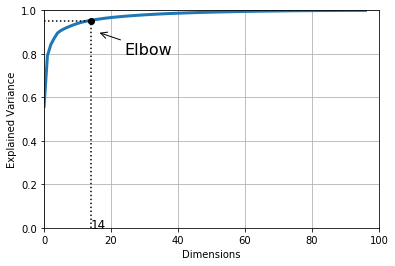

In [24]:
plt.figure(figsize=(6,4))
plt.plot(cumsum,lw=3)
plt.axis([0,100,0,1])
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(16, 0.9), xytext=(24, 0.8),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.annotate("14", xy=(14, 0),fontsize=12)
plt.grid(True)
plt.show()

In [25]:
# Approach 2
pca = PCA(n_components=0.95)
df_reduced = pca.fit_transform(df)

In [26]:
pca.n_components_

14

In [27]:
np.sum(pca.explained_variance_ratio_)

0.9514506105312239

In [28]:
#  choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%).d=14

### Step 5: construct factors with d=14, and perform Regression

In [29]:
top_factors= np.zeros((df.shape[0],d))

In [30]:
for i in range(d):
    eigen_vec = eig_vecs[i,:]
    eigen_vec /= std_vec
    top_factors[:,i] = df.dot(eigen_vec)

In [31]:
print(data1.columns.get_loc('V'))

92


In [32]:
y = np.array(df)[:,92]  # choose return of Visa as response variable
x1 = sm.add_constant(top_factors)
# construct OLS model
model = sm.OLS(y,x1)
# fit model and print results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     949.4
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:56:38   Log-Likelihood:                 112.75
No. Observations:                 554   AIC:                            -195.5
Df Residuals:                     539   BIC:                            -130.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0061      0.009      0.670      0.5

In [33]:
# in 14-dimension, the R-squared is 96.1%, so this model can at least explain 96% of original variance; it's a very good performance
# Although some of P values are large due to non-significant coefficient, most of P values are zero

### Step 6: Construct Trading Signals

In [34]:
residual = y-np.dot(x1,results.params)

Text(0, 0.5, 'signal')

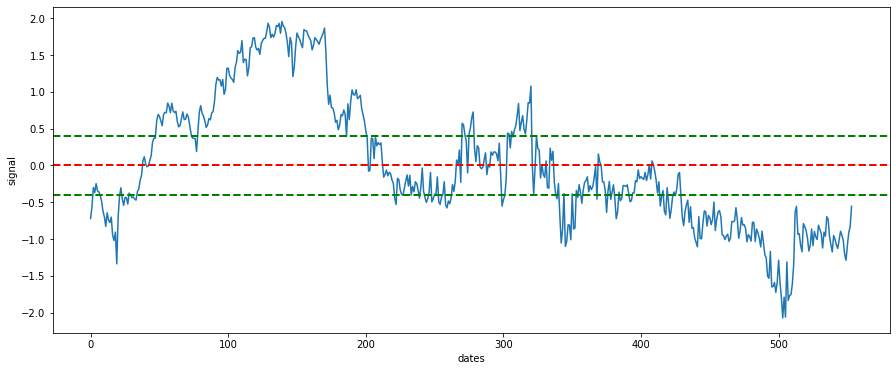

In [35]:
plt.figure(figsize=(15,6))
plt.plot(np.cumsum(residual)-np.mean(np.cumsum(residual)))
plt.axhline(residual.mean(),ls='--',c='r',lw=2)
plt.axhline(residual.mean()+2*residual.std(),ls='--',c='g',lw=2)
plt.axhline(residual.mean()-2*residual.std(),ls='--',c='g',lw=2)
plt.xlabel('dates')
plt.ylabel('signal')

In [36]:
2*residual.std()

0.39482731279727523

In [37]:
# Trading strategy: 
# Set threshold at 2 standard deviation of residual (0.394)
# Short V+Long other 96 stocks multiplied by parameters when signal hits level (mean+2std),
# Long V+SHORT other 96 stocks when signal hits level (mean-2std)
# Based on In-sample data, can execute 10 times trading, each trading earns $0.394

### Step 7: Test trading strategy(Out of sample)

In [57]:
start_te = datetime.datetime(2021,1,1)
end_te = datetime.datetime(2021,11,30)
test_data = yf.download(stock_list,start_te,end_te)
test_data = test_data['Close']

[*********************100%***********************]  100 of 100 completed


In [39]:
df2 = test_data.reset_index()

In [40]:
df2= df2.drop(columns=['2222.SR','MPNGF','PRX.VI'],axis=1)

In [41]:
# drop all empty rows and us market closing dates
list2 = ['2021-01-01','2021-01-03','2021-01-10','2021-01-17','2021-01-24','2021-01-31','2021-02-07','2021-02-14',
         '2021-02-15','2021-02-21','2021-02-28','2021-03-07','2021-03-14','2021-03-21','2021-03-28,','2021-04-02',
         '2021-04-04','2021-04-11','2021-04-18','2021-04-25','2021-05-02','2021-05-09','2021-05-23','2021-05-30',
         '2021-07-11','2021-07-25','2021-08-01','2021-08-08','2021-08-15','2021-08-22','2021-08-29','2021-09-05',
         '2021-09-06','2021-09-12','2021-09-19','2021-09-26','2021-10-03','2021-10-10','2021-10-17','2021-10-24',
         '2021-10-31','2021-11-7','2021-11-14','2021-11-21','2021-11-25','2021-11-28']
df2 = df2[~df2['Date'].isin(list2)].set_index('Date')
df2

,000858.SZ,002594.SZ,005930.KS,1398.HK,300750.SZ,3968.HK,600519.SS,AAPL,ABBV,ABT,...,TXN,UL,UNH,UNP,UPS,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.690002,107.150002,109.489998,...,164.130005,60.360001,350.679993,208.220001,168.399994,218.729996,58.750000,30.180000,144.149994,41.220001
2021-01-04,298.049988,206.759995,83000.0,4.85,404.100006,47.000000,1997.000000,129.410004,105.410004,109.110001,...,162.220001,60.529999,349.500000,203.009995,163.800003,217.759995,58.849998,29.700001,146.529999,41.500000
2021-01-05,319.980011,219.899994,83900.0,4.81,402.000000,47.849998,2059.449951,131.009995,106.500000,110.459999,...,163.410004,60.560001,344.799988,205.500000,161.520004,214.509995,58.580002,30.530001,145.750000,43.500000
2021-01-06,328.299988,216.300003,82200.0,4.82,406.769989,49.200001,2100.000000,126.599998,105.580002,110.230003,...,164.220001,60.650002,359.269989,209.800003,161.039993,212.619995,59.290001,32.689999,146.660004,44.610001
2021-01-07,330.000000,225.039993,82900.0,4.91,413.230011,52.200001,2140.000000,130.919998,106.709999,111.300003,...,167.940002,59.820000,365.029999,212.720001,159.000000,213.809998,58.529999,33.430000,146.649994,44.959999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-22,215.970001,311.000000,74900.0,4.27,681.000000,63.849998,1854.270020,161.020004,115.650002,125.260002,...,192.500000,51.270000,437.540009,243.910004,210.880005,195.580002,51.540001,50.340000,144.779999,61.509998
2021-11-23,214.800003,308.480011,75300.0,4.25,672.000000,63.599998,1896.430054,161.410004,118.879997,124.480003,...,192.639999,52.250000,447.130005,247.369995,211.809998,198.490005,51.750000,51.400002,145.809998,63.130001
2021-11-24,224.419998,303.200012,74800.0,4.26,658.799988,63.400002,1941.000000,161.940002,118.660004,125.070000,...,193.600006,52.099998,450.160004,246.600006,208.470001,203.250000,51.660000,51.310001,146.539993,63.480000


In [42]:
impute_it=IterativeImputer()
data_te = pd.DataFrame(impute_it.fit_transform(df2))
data_te.columns=df2.columns
data_te.index = df2.index
data_te[35:40]

C:\anoconda\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


,000858.SZ,002594.SZ,005930.KS,1398.HK,300750.SZ,3968.HK,600519.SS,AAPL,ABBV,ABT,...,TXN,UL,UNH,UNP,UPS,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-22,313.059998,239.520004,82200.0,5.13,375.000000,62.900002,2288.020020,126.000000,107.059998,122.550003,...,173.089996,54.310001,327.640015,206.830002,161.600006,208.320007,56.450001,37.259998,137.690002,54.299999
2021-02-23,315.000000,225.000000,82000.0,5.27,376.540009,66.349998,2307.000000,125.860001,106.269997,120.800003,...,172.850006,55.419998,329.510010,206.960007,160.809998,212.110001,57.029999,37.139999,135.470001,55.049999
2021-02-24,293.079987,208.990005,82000.0,5.17,347.000000,62.700001,2189.000000,125.349998,108.690002,122.379997,...,179.389999,54.259998,332.209991,211.149994,160.070007,219.429993,57.119999,38.290001,133.210007,56.700001
2021-02-25,288.899994,209.250000,85300.0,5.24,337.100006,64.000000,2150.000000,120.989998,107.330002,121.580002,...,170.529999,53.810001,328.869995,208.669998,157.509995,213.750000,56.500000,37.560001,131.949997,55.759998
2021-02-26,280.000000,197.270004,82500.0,5.06,322.230011,59.549999,2122.780029,121.260002,107.739998,119.779999,...,172.270004,52.060001,332.220001,205.960007,157.830002,212.389999,55.299999,36.169998,129.919998,54.369999


In [43]:
# Return Rate
df_te = np.array(data_te.pct_change(1)[1:])
# normalize data
df_te = df_te/np.std(df_te,axis=0)
# covariance/eigen_val/eigen_vector
cov_te = np.cov(df_te.T)
std_vector_te = np.std(df_te,axis=0)
te_eig_vals,te_eig_vecs = np.linalg.eig(cov_te)
te_eig_vecs = te_eig_vecs.T
sort_indices = te_eig_vals.argsort()[::-1]
te_eig_vals = te_eig_vals[sort_indices]
te_eig_vecs = te_eig_vecs[sort_indices]

In [44]:
te_eig_vals.shape

(97,)

In [45]:
te_eig_vecs.shape

(97, 97)

In [46]:
df_te.shape

(237, 97)

In [47]:
te_top_factors = np.zeros((df_te.shape[0],d))
for i in range(d):
    te_eigen_vec = te_eig_vecs[i,:]
    te_eigen_vec /= std_vector_te
    te_top_factors[:,i] = df_te.dot(te_eigen_vec)

In [48]:
y_te = np.array(df_te)[:,8]
X_te = sm.add_constant(te_top_factors)
results_te = sm.OLS(y_te,X_te).fit()

In [49]:
print(results_te.summary())  # the R-squared=0.585, good performance

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     22.38
Date:                Mon, 13 Dec 2021   Prob (F-statistic):           4.78e-35
Time:                        13:57:14   Log-Likelihood:                -231.97
No. Observations:                 237   AIC:                             493.9
Df Residuals:                     222   BIC:                             546.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0051      0.044      0.114      0.9

In [50]:
# the R-squared is 58.3%, so this features can almost explain 60% of target variables; 
# the performance is acceptable.
# Although some of P values are large due to non-significant coefficient(especially the constant's P values), 
# most of P values are zero

In [51]:
Residual = y_te-np.dot(X_te,results_te.params)
Residual_index = len(residual)+np.cumsum(np.ones(Residual.shape[0]))-1

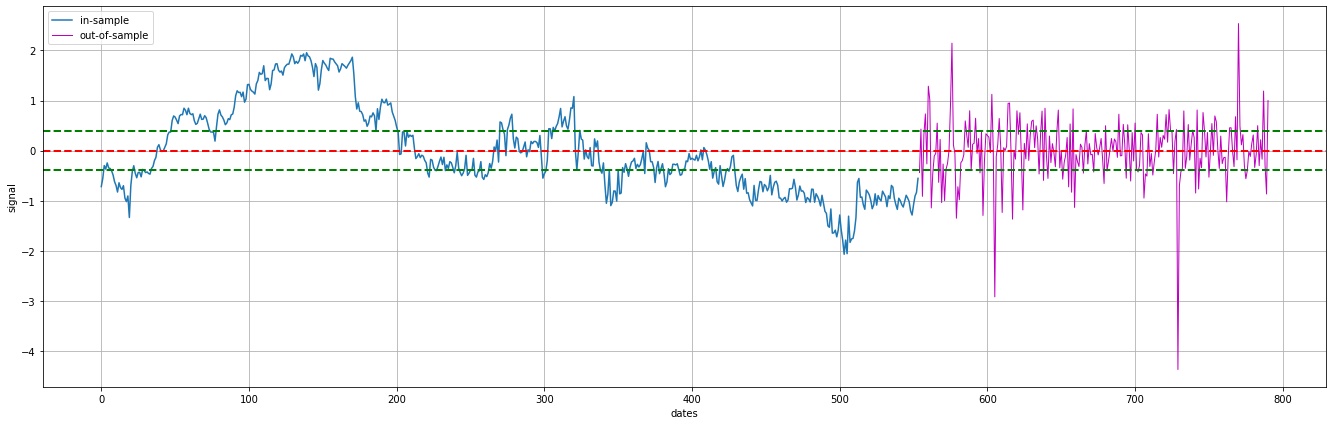

In [55]:
plt.figure(figsize=(23,7))
plt.plot(np.cumsum(residual)-np.mean(np.cumsum(residual)),label='in-sample')
plt.plot(Residual_index,Residual,lw=1,c='m',label='out-of-sample')
plt.axhline(residual.mean(),ls='--',c='r',lw=2)
plt.axhline(residual.mean()+2*residual.std(),ls='--',c='g',lw=2)
plt.axhline(residual.mean()-2*residual.std(),ls='--',c='g',lw=2)
plt.xlabel('dates')
plt.ylabel('signal')
plt.grid()
plt.legend()

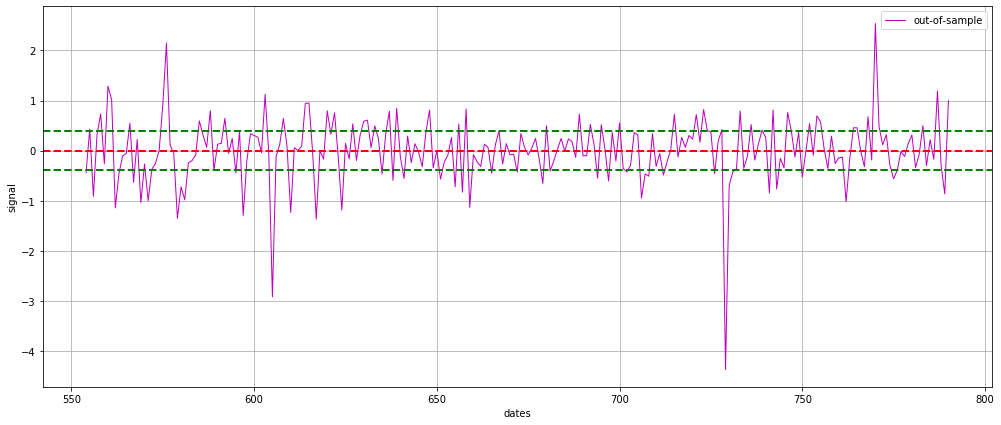

In [58]:
plt.figure(figsize=(17,7))
plt.plot(Residual_index,Residual,lw=1,c='m',label='out-of-sample')
plt.axhline(residual.mean(),ls='--',c='r',lw=2)
plt.axhline(residual.mean()+2*residual.std(),ls='--',c='g',lw=2)
plt.axhline(residual.mean()-2*residual.std(),ls='--',c='g',lw=2)
plt.xlabel('dates')
plt.ylabel('signal')
plt.grid()
plt.legend()

In [53]:
# long Visa (short others) for 37 times, short Visa (long others) for 41 times, each trade earns 0.3948
# The total profit is $30.79

### Step 8: Compares with the pair-trading strategy

In [60]:
# find cointegrated stocks with Visa
# define cointegration function
import seaborn as sns
def find_cointegrated_pairs(dataframe):
    # length of dataframe
    n = dataframe.shape[1]
    # Initialize matrix of p values:
    pvalue_matrix = np.ones((n,n))
    keys = dataframe.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1,n):
            stock1 = dataframe[keys[i]]
            stock2 = dataframe[keys[j]]
            # integration
            result = sm.tsa.stattools.coint(stock1,stock2)
            pvalue = result[1]
            pvalue_matrix[i,j]= pvalue
            if pvalue < 0.05:
                pairs.append((keys[i],keys[j],pvalue))
    return pvalue_matrix, pairs

In [93]:
# visa is in credit service industry, I choose 37 stocks in the same industry.(swingtradebot.com)
# Due to the main business, these stocks are strongly correlated 
stock_credit = ['NNI','CPSS','OCSL','MRLN','MBNKP','PRAA','CACC','ENVA','MFIN','WRLD',
                'SLM','NAVI','IX','GSBD','SNFCA','CNF','MGI','LMFA',
                 'SYF','AXP','MA','DFS','FOA','ATLC','BBDC','NICK','SLMBP','AGM',
                  'QFIN','RM','EZPW','WEI','LC','COF','V','PYPL','GLG']

In [147]:
start_c = datetime.datetime(2021,1,1)
end_c = datetime.datetime(2021,6,1)
data_v = yf.download(stock_credit,start_c,end_c)
data_v =data_v['Close']

[*********************100%***********************]  37 of 37 completed


In [148]:
data_v = data_v.dropna()

In [149]:
data_v.columns

Index(['AGM', 'ATLC', 'AXP', 'BBDC', 'CACC', 'CNF', 'COF', 'CPSS', 'DFS',
       'ENVA', 'EZPW', 'FOA', 'GLG', 'GSBD', 'IX', 'LC', 'LMFA', 'MA', 'MBNKP',
       'MFIN', 'MGI', 'MRLN', 'NAVI', 'NICK', 'NNI', 'OCSL', 'PRAA', 'PYPL',
       'QFIN', 'RM', 'SLM', 'SLMBP', 'SNFCA', 'SYF', 'V', 'WEI', 'WRLD'],
      dtype='object')

### Step 8.1 Find cointegrated stock

[('AGM', 'DFS', 0.00508584147678475), ('AGM', 'FOA', 0.002623102642240613), ('AGM', 'MBNKP', 0.009569824314826822), ('AGM', 'MFIN', 0.04818297682869792), ('AGM', 'PRAA', 0.033774697445901274), ('AGM', 'SLM', 0.023756025304327664), ('AGM', 'V', 0.04194056342874565), ('ATLC', 'AXP', 0.03318367948798501), ('ATLC', 'COF', 0.014651293958056205), ('ATLC', 'EZPW', 0.019977206976282733), ('ATLC', 'NAVI', 0.009855217201331182), ('ATLC', 'RM', 0.028764243260244276), ('ATLC', 'SLM', 0.04315138951352003), ('AXP', 'CACC', 0.019950318876756367), ('AXP', 'CNF', 0.03451824086553263), ('AXP', 'COF', 0.006970991141000159), ('AXP', 'ENVA', 0.019800935913141863), ('AXP', 'MFIN', 0.009763456049071069), ('AXP', 'NAVI', 0.0032940541404179896), ('AXP', 'SLMBP', 0.006383393342379321), ('BBDC', 'CNF', 0.046721790032470026), ('BBDC', 'RM', 0.026521727978646596), ('CACC', 'CNF', 0.004900708598732447), ('CACC', 'COF', 0.04796900665542206), ('CACC', 'NAVI', 0.001660249836778869), ('CACC', 'SLMBP', 0.027230919254798

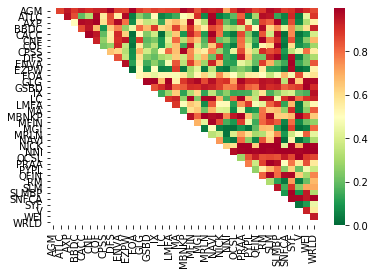

In [150]:
pvalues,pairs = find_cointegrated_pairs(data_v)
list_c = data_v.columns.tolist()
sns.heatmap(1-pvalues,xticklabels=list_c,yticklabels=list_c,cmap='RdYlGn_r',mask=(pvalues ==1))
print(pairs)

In [132]:
# the smaller p-value is, the higher cointegration is 
# AVG-V: 0.042 MBNKP-V: 0.000598; NNI-V: 0.00919; OCSL-V: 0.00054; SNFCA: 0.012;
# Choose OCSL and V to construct pairs trading

### Step 8.2: Data Visualization

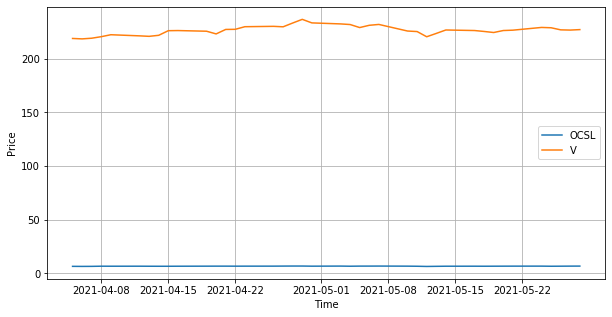

In [157]:
# highly cointegrated with visa: 'SYF'(Synchrony Financial)
stock_sample1 = data_v['OCSL']
stock_sample2 = data_v['V']
plt.figure(figsize=(10,5))
plt.plot(stock_sample1,label='OCSL')
plt.plot(stock_sample2,label='V')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()

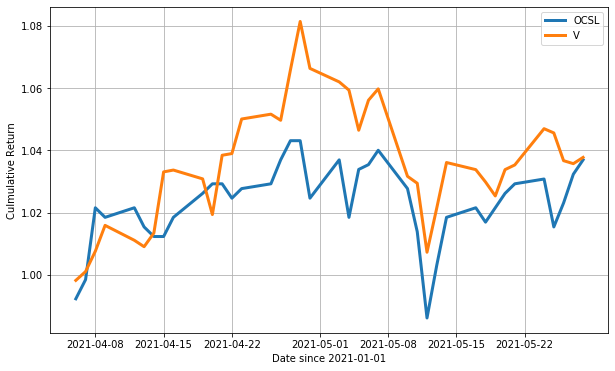

In [158]:
cm_syf = (data_v['OCSL'].pct_change()+1).cumprod()
cm_v = (data_v['V'].pct_change()+1).cumprod()
plt.figure(figsize=(10,6))
plt.plot(cm_syf,lw=3,label='OCSL')
plt.plot(cm_v,lw=3,label='V')
plt.xlabel('Date since 2021-01-01')
plt.ylabel('Culmulative Return')
plt.grid()
plt.legend()

### Step 8.3: OLS Linear Regression

In [159]:
x = sm.add_constant(data_v['OCSL'],prepend=False)
ols = sm.OLS(data_v['V'],x).fit()  # y=kx+b
beta = ols.params
y_fit = [x.min().dot(beta),x.max().dot(beta)]

In [160]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      V   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     52.60
Date:                Mon, 13 Dec 2021   Prob (F-statistic):           1.12e-08
Time:                        18:12:03   Log-Likelihood:                -97.867
No. Observations:                  40   AIC:                             199.7
Df Residuals:                      38   BIC:                             203.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
OCSL          39.1335      5.396      7.253      0.0

In [161]:
# R_squared is 0.581

In [162]:
data_v=data_v.reset_index()

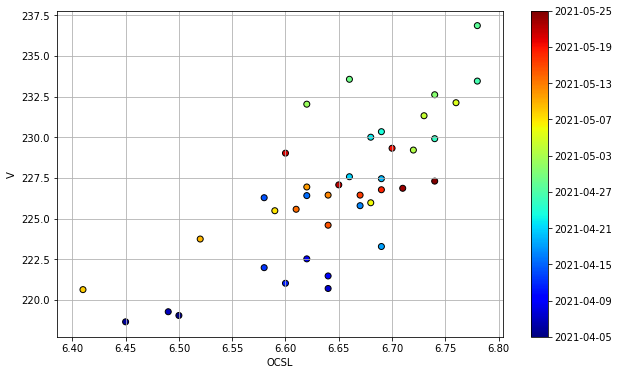

In [163]:
# Price Relationship between 'NNI' and 'V'
plt.figure(figsize=(10,6))
colors = np.linspace(0.1,1,len(data_v))
sc = plt.scatter(data_v['OCSL'],data_v['V'],c=colors,cmap=plt.get_cmap('jet'),edgecolor='k')
cb=plt.colorbar(sc)
cb.ax.set_yticklabels([str(data_v['Date'][p])[:10] for p in data_v[::len(data_v)//9].index])
plt.xlabel('OCSL')
plt.ylabel('V')
plt.grid()

### Step 8.4: Modeling Spread and design trading strategy

In [164]:
beta

OCSL     39.133488
const   -33.417526
dtype: float64

In [174]:
spread = pd.DataFrame(data_v['V']-beta[0]*data_v['OCSL']-beta[1])
spread.columns = ['in-sample']

Text(0.5, 1.0, 'OCSL-V Spread')

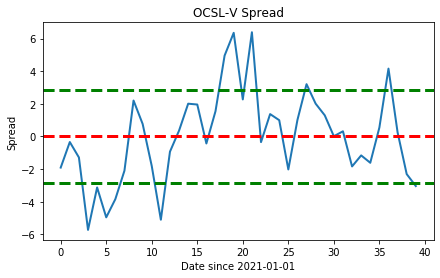

In [179]:
plt.figure(figsize = (7,4))
plt.plot(spread,lw=2)
plt.axhline(spread['in-sample'].mean(),ls='--',c='r',lw=3)
plt.axhline(spread['in-sample'].mean()+spread['in-sample'].std(),ls='--',c='g',lw=3)
plt.axhline(spread['in-sample'].mean()-spread['in-sample'].std(),ls='--',c='g',lw=3)
plt.xlabel('Date since 2021-01-01')
plt.ylabel('Spread')
plt.title('OCSL-V Spread')

In [180]:
spread['in-sample'].std()  # Each trade earns $2.83

2.8303416324850095

### Step 8.5: Test trading strategy

In [182]:
start_cte = datetime.datetime(2021,6,1)
end_cte = datetime.datetime(2021,12,1)
data_OCSL_te = yf.download('OCSL',start_cte,end_cte)
data_V_te = yf.download('V',start_cte,end_cte)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [183]:
data_OCSL_te=data_OCSL_te.reset_index()
data_OCSL_te = data_OCSL_te[['Date','Close']]
data_OCSL_te.columns=['Date','OCSL']
data_V_te=data_V_te.reset_index()
data_V_te=data_V_te[['Date','Close']]
data_V_te.columns=['Date','V']

In [184]:
df_c = pd.merge(data_OCSL_te,data_V_te,on='Date')
df_c[:5]

,Date,OCSL,V
0,2021-06-01,6.79,226.630005
1,2021-06-02,6.80,229.660004
2,2021-06-03,6.75,228.110001
3,2021-06-04,6.79,230.139999
4,2021-06-07,6.81,231.320007


In [185]:
spread_te = pd.DataFrame(df_c['V']-beta[0]*df_c['OCSL']-beta[1])
spread_index = len(spread)+np.cumsum(np.ones(spread_te.shape[0]))-1

Text(0.5, 0, 'Date since 2021-06-01')

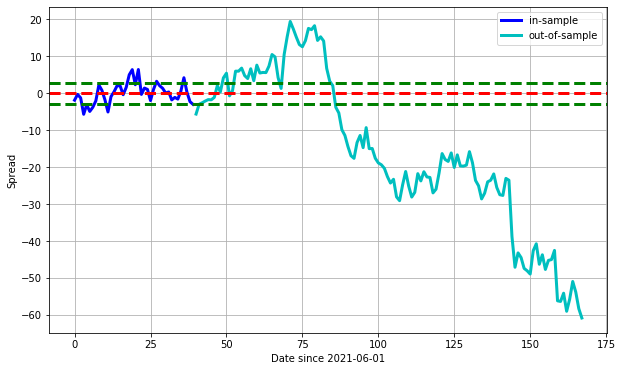

In [187]:
plt.figure(figsize=(10,6))
plt.plot(spread,lw=3,c='b',label='in-sample')
plt.plot(spread_index,spread_te,lw=3,c='c',label='out-of-sample')
plt.axhline(spread['in-sample'].mean(),ls='--',c='r',lw=3)
plt.axhline(spread['in-sample'].mean()+spread['in-sample'].std(),ls='--',c='g',lw=3)
plt.axhline(spread['in-sample'].mean()-spread['in-sample'].std(),ls='--',c='g',lw=3)
plt.legend()
plt.grid()
plt.ylabel('Spread')
plt.xlabel('Date since 2021-06-01')

### Step 9: Conclusion

In [188]:
pca_r_in = 3.94  # during 2019-2020 (2 years)
pca_r_out = 30.79 # 2021-1~2021-11 (11 months)
pt_r_in = 1.45 # 2021-1~2021-06
pt_r_out = 0.85 # 2021-6~2021-11
# Dynamic Trading Strategy based on PCA is far more successful